In [1]:
from tqdm import tqdm

data_home = '/blob/shufxi/data/ur50split'

data = []
for i in range(4):
    with open(f'{data_home}/uniref50_2023_05.shorten.train.taged2.seqs.{i}.scored', 'r') as f:
        for line in tqdm(f):
            seq, score = line.strip().split()
            score = float(score)
            data.append((seq, score))

13400000it [00:17, 775586.72it/s]
13400000it [00:17, 768638.51it/s]
13400000it [00:16, 791225.00it/s]
13345930it [00:17, 784857.44it/s]


In [2]:
len(data)

53545930

In [3]:
sorted_data = sorted(data, key=lambda x: x[1])

In [13]:
i, cnt = 0, 0,
while cnt < 200:
    seq = sorted_data[i][0]
    if not seq.startswith('<protein>MQIFVKTLT'):
        cnt += 1
        print(sorted_data[i][0], sorted_data[i][1])
    i += 1

<protein>MRECISIHVGQAGVQIGNACWELYCLEHGIQPDGQMPSDKTIGGGDDSFNTFFSETGAGKHVPRAVFVDLEPTVIDEVRTGTYRQLFHPEQLITGKEDAANNYARGHYTIGKEIIDLVLDRIRKLADQCTGLQGFLVFHSFGGGTGSGFTSLLMERLSVDYGKKSKLEFSIYPAPQVSTAVVEPYNSILTTHTTLEHSDCAFMVDNEAIYDICRRNLDIERPTYTNLNRLIGQIVSSITASLRFDGALNVDLTEFQTNLVPYPRIHFPLATYAPVISAEKAYHEQLSVAEITNACFEPANQMVKCDPRHGKYMACCLLYRGDVVPKDVNAAIATIKTKRTIQFVDWCPTGFKVGINYQPPTVVPGGDLAKVQRAVCMLSNTTAIAEAWARLDHKFDLMYAKRAFVHWYVGEGMEEGEFSEAREDMAALEKDYEEVGVDSVEGEGEEEGEEY</protein> 0.13961896300315857
<protein>MREIVHLQAGQCGNQIGAKFWEVISDEHGIDPTGTYHGDSDLQLERINVYYNEATGGKYVPRAVLVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGAELVDSVLDVVRKEAESCDCLQGFQLTHSLGGGTGSGMGTLLISKIREEYPDRIMNTFSVVPSPKVSDTVVEPYNATLSVHQLVENTDETYCIDNEALYDICFRTLKLTTPTYGDLNHLVSATMSGVTTCLRFPGQLNADLRKLAVNMVPFPRLHFFMPGFAPLTSRGSQQYRALTVPELTQQMFDAKNMMAACDPRHGRYLTVAAVFRGRMSMKEVDEQMLNVQNKNSSYFVEWIPNNVKTAVCDIPPRGLKMSATFIGNSTAIQELFKRISEQFTAMFRRKAFLHWYTGEGMDEMEFTEAESNMNDLVSEYQQYQDATAEEEGEFEEEAEEEVA</protein> 0.16630063951015472
<protein>MSFVLVSPETVAAVA

In [9]:
for i in range(50):
    print(sorted_data[-i-1][0][:300], sorted_data[-i-1][1])

<protein>MCLIGCSFLLLCCSYVICGNDWSYNDKTQWTGLCATGKQQSPIDVSFYDLERKNIEPLEFHDYNITGEITGLNNGHTELVQGFESWSTQPYITGGGLQGKYYLAQFHFHWDGRDNLGSEHTLNHLHYPLEIHLLHVQQGVHPSNADIYPNSIAVVAVFFEMSDDGTPLEPLTNILRRTIQTSKESVNEGYNPSDLLPSDTSSFLYYNGSLTTPPCSETVRWFLMTQPSRVTELQLKRFRVRRGEQSLFLIDNWRPTQPMNGRKVYLSQTNSIQP</protein> 9.031603813171387
<protein>MKITDWYVIVSLTMPSTWVAVLLALILTSLTLLLQFNKQVASHFVDAAIAFILLWKFSVIVTDFYAVVHEPFSLLYFNGGYVGVVIGTLGALISLIRAKVSVSIIQLMAVYSVSYYLFFMVVLNSNPILIELVTLITLVIVFVLLWKKVTVRILPVGLLFFIAFFQPLGVFQTYIVWMFSVLLVLYSYQVFRNKKVGMTS</protein> 8.898815155029297
<protein>SENESDTESZLLZNSPPGE</protein> 8.758384704589844
<protein>SLLBFKBMIEST</protein> 8.580002784729004
<protein>QEGLSYEEIETPVFSIFIKTDETPVKMIKLFSNR</protein> 8.551499366760254
<protein>VNDSDAVIAAPERFRPNLQVICVLKKKGEEEDDHVASCYWSFLDFKTWPFDRFS</protein> 8.484156608581543
<protein>QQHPPHEIEGEKVVKPSVGGYCGSPYPHVDSSSYELHGPDNVEFIDGRKPY</protein> 8.481951713562012
<protein>FYEYRIDLFAFSQKLDVTIAVELKLHRWRRALEQSLLYQLCADFVFIALPAPTIARV</protein> 8.46786403656

In [44]:
sorted_data[-1]

('<protein>MCLIGCSFLLLCCSYVICGNDWSYNDKTQWTGLCATGKQQSPIDVSFYDLERKNIEPLEFHDYNITGEITGLNNGHTELVQGFESWSTQPYITGGGLQGKYYLAQFHFHWDGRDNLGSEHTLNHLHYPLEIHLLHVQQGVHPSNADIYPNSIAVVAVFFEMSDDGTPLEPLTNILRRTIQTSKESVNEGYNPSDLLPSDTSSFLYYNGSLTTPPCSETVRWFLMTQPSRVTELQLKRFRVRRGEQSLFLIDNWRPTQPMNGRKVYLSQTNSIQP</protein>',
 9.031603813171387)

In [16]:
from collections import Counter, defaultdict

In [15]:
aa_freq_cnt = Counter()
for seq, _ in tqdm(data):
    seq = seq.replace('<protein>', '').replace('</protein>', '')
    cnt = len(set(seq))
    aa_freq_cnt[cnt] += 1
    
print(aa_freq_cnt)

100%|██████████| 53545930/53545930 [04:00<00:00, 222998.52it/s]

Counter({20: 27655649, 19: 12768172, 18: 6167185, 17: 3226829, 16: 1719283, 15: 910181, 14: 479688, 13: 256411, 12: 141794, 11: 81827, 10: 51082, 9: 33392, 8: 21455, 7: 13522, 6: 8400, 5: 5038, 4: 3983, 21: 1156, 3: 799, 2: 80, 22: 4})


In [17]:
group_by_prefix = defaultdict(list)

for seq, score in tqdm(data):
    seq = seq.replace('<protein>', '').replace('</protein>', '')
    prefix = seq[:8]
    group_by_prefix[prefix].append((seq, score))

100%|██████████| 53545930/53545930 [07:09<00:00, 124704.75it/s]


In [18]:
len(group_by_prefix)

45609649

In [20]:
for prefix, data in group_by_prefix.items():
    if len(data) > 100:
        avg_score = sum([x[1] for x in data]) / len(data)
        print(prefix, len(data), avg_score)

MKKLLILS 106 6.350458244107804
MIGRADIE 184 3.895642009118329
SDSDSDSD 252 1.437869021402938
MKKIFLIL 176 6.5206210884180935
MGRKKIQI 157 4.178175551116846
MRVLLVED 140 4.783578383922577
MSHEIRTP 149 4.493263615857835
DSDSDSDS 284 1.3812537935732956
MSGNIGAN 143 6.420838182831144
MLLLLLLL 207 6.353295874480464
MKKLFLFL 121 6.450745645633414
MKIKEQTR 1073 1.4210633099745726
MKKLLPLL 119 6.235219366410199
MPIYEYEC 148 4.682711184024811
MIEMKVAG 112 2.160501817507403
MKKILLIL 359 6.525111308004862
MRILIVDD 133 5.170686400922618
MTKSTITR 253 3.0273294462988027
MKKILLAL 200 6.350243439674378
MKKILFSL 111 6.3003143834638164
MKKLLAIL 167 6.223655974793577
MKKVLITG 110 5.133328730409795
MKKILLAA 115 6.2304516688637115
MKKIILVL 129 6.480213464692581
MKKLLLIA 195 6.285103673201341
MKKLLFLL 321 6.412674355729718
MKKLLIII 109 6.451080803477436
PQITLWQR 6036 0.598613474281064
MYVCMYVC 180 3.5712121421264276
MQLFHLCL 134 1.99233813383686
MKKILSII 105 6.268080007462275
MEKPWKCG 120 2.3550287733475366

MRLLLLLL 114 6.247536569310908
MIISASRR 106 4.272145327532066
MKIKVQTR 152 1.4494712764495297
GGGGGGGA 112 6.462139801255295
MADQLTEE 156 2.0391110365207377
MIFVTVGT 122 4.8317113469858635
MKILLVDD 145 5.150704579517759
MKKTLLSL 134 6.327786785453113
MKKLILAL 114 6.390858355321382
MKKTLLLA 117 6.239527478177323
MKKLLLIF 137 6.518396615982056
MKRLLLIL 107 6.34736188995504
MKKIFLFL 132 6.444344134041757
GGVGKTTL 112 4.5671176463365555
MKKILLGL 101 6.441232978707493
NSFCTLLV 140 6.681688693591527
MPSPFPGM 143 5.399642552529182
MSEYQYYE 152 5.410914323831859
CKEMEEEG 117 0.7649497817724179
MKLLLDTH 105 4.786540344783238
MKKTLILL 107 6.392035181277266
MKKLLVVL 101 6.336624546806411
MKKLLILI 118 6.384265758223453
MGEAKRRK 108 7.10035177954921
MKKIILIF 123 6.604932821863066
MKILVVED 116 4.8042798021744035
MKKIIILI 129 6.50020075953284
MKTVLITG 109 4.97138921711423
TGATGATG 124 1.8007642694057957
MKVLITGA 123 5.242060031348128
MKKILLAS 101 6.016621341799746
PTPTPTPT 102 5.510100051468494
MKKSL

In [11]:
with open(f'{data_home}/uniref50_2023_05.sorted', 'w') as f:
    for seq, score in tqdm(sorted_data):
        f.write(seq+'\n')

100%|██████████| 53545930/53545930 [03:07<00:00, 286309.82it/s]


In [1]:
from matplotlib import pyplot as plt


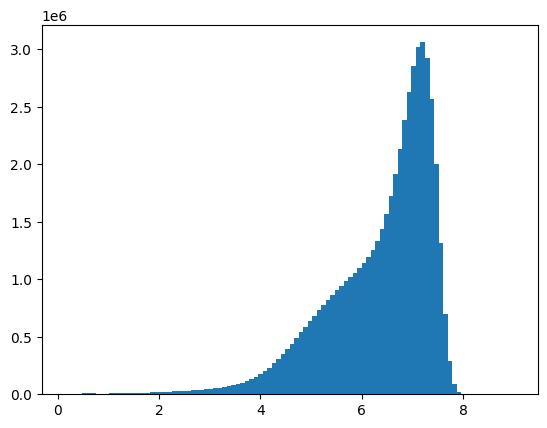

In [6]:
plt.hist([x[1] for x in data], bins=100)
plt.show()

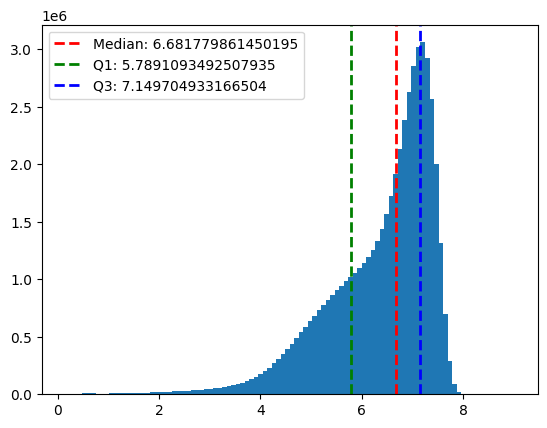

In [7]:
import numpy as np

data_values = [x[1] for x in data]

# Calculate statistics
median = np.median(data_values)
q1 = np.percentile(data_values, 25)
q3 = np.percentile(data_values, 75)

# Plot histogram
plt.hist(data_values, bins=100)

# Add vertical lines for median, Q1, and Q3
plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median}')
plt.axvline(q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1: {q1}')
plt.axvline(q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3: {q3}')

# Add legend
plt.legend()

plt.show()

In [13]:
data_values = np.array(data_values)
scores = np.exp(-data_values)
scores = scores / scores.sum()

In [23]:
print(data_values.min(), scores.max())
print(data_values.max(), scores.min())

0.12640072405338287 3.7395508273013444e-06
9.031603813171387 5.073864659161718e-10


In [17]:
sampled_indices = np.random.choice(len(data_values), size=10_000_000, p=scores, replace=False)

In [18]:
sampled_scores = data_values[sampled_indices]

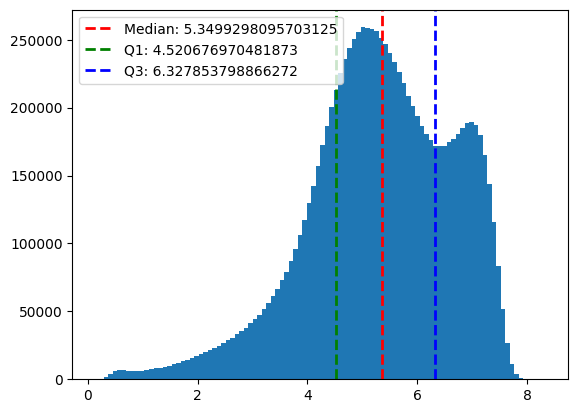

In [21]:
median = np.median(sampled_scores)
q1 = np.percentile(sampled_scores, 25)
q3 = np.percentile(sampled_scores, 75)

# Plot histogram
plt.hist(sampled_scores, bins=100)

# Add vertical lines for median, Q1, and Q3
plt.axvline(median, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median}')
plt.axvline(q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1: {q1}')
plt.axvline(q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3: {q3}')

# Add legend
plt.legend()

plt.show()

In [24]:
with open(f'{data_home}/uniref50_2023_05.sampled10M', 'w') as f:
    for i in tqdm(sampled_indices):
        f.write(data[i][0]+'\n')

100%|██████████| 10000000/10000000 [00:41<00:00, 243512.01it/s]


In [25]:
sorted_data[0]

NameError: name 'sorted_data' is not defined